In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.utils.multiclass import type_of_target
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 42A7-BDFB

 Directory of C:\Users\Narasimhulu E\Documents\Assingnments\Naive Bayes\naive byes

06/02/2023  10:15 AM    <DIR>          .
04/26/2023  11:04 PM    <DIR>          ..
04/27/2023  12:04 AM    <DIR>          .ipynb_checkpoints
06/02/2023  10:15 AM           179,920 NAIVE BAYES (Salary.data).ipynb
04/26/2023  10:50 PM               617 Problem_statement(salary_data) (1).txt
04/26/2023  10:50 PM         1,694,474 SalaryData_Test.csv
04/26/2023  10:50 PM         1,227,617 SalaryData_Train.csv.crdownload
               4 File(s)      3,102,628 bytes
               3 Dir(s)  15,044,579,328 bytes free


In [3]:
nb=pd.read_csv("SalaryData_Train.csv.crdownload")

In [4]:
nb

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,40,Local-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
10910,46,Private,7th-8th,4,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,45.0,United-States,<=50K
10911,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
10912,33,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0.0,1092.0,40.0,United-States,<=50K


In [5]:
ns=pd.read_csv("SalaryData_Test.csv")

In [6]:
ns

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [7]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            10914 non-null  int64  
 1   workclass      10914 non-null  object 
 2   education      10914 non-null  object 
 3   educationno    10914 non-null  int64  
 4   maritalstatus  10914 non-null  object 
 5   occupation     10914 non-null  object 
 6   relationship   10913 non-null  object 
 7   race           10913 non-null  object 
 8   sex            10913 non-null  object 
 9   capitalgain    10913 non-null  float64
 10  capitalloss    10913 non-null  float64
 11  hoursperweek   10913 non-null  float64
 12  native         10913 non-null  object 
 13  Salary         10913 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [8]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
nb["Salary"].unique()

array([' <=50K', ' >50K', nan], dtype=object)

In [10]:
print('After droping duplictes',nb.shape)
print('Before droping duplictes',ns.shape)

After droping duplictes (10914, 14)
Before droping duplictes (15060, 14)


In [11]:
nb.drop_duplicates(keep=False,inplace=True)
ns.drop_duplicates(keep=False,inplace=True)

In [12]:
print('After dropping duplicates',nb.shape)
print('After dropping duplicates',ns.shape)

After dropping duplicates (9898, 14)
After dropping duplicates (13450, 14)


In [13]:
nb.drop('native',axis=1,inplace=True)
ns.drop('native',axis=1,inplace=True)

In [14]:
nb.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,<=50K


In [15]:
ns.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K


# Label Encoding Categorical Columns of train and test dataset

In [16]:
fe=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']

LE=preprocessing.LabelEncoder()
for col in fe:
    
    nb[col]=LE.fit_transform(nb[col])
    ns[col]=LE.fit_transform(ns[col])
    print(LE.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [17]:
nb.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,0
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,0
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,0
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,0
4,28,2,9,13,2,10,5,2,0,0.0,0.0,40.0,0


In [18]:
ns.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [19]:
ns['Salary'].value_counts()

0    10093
1     3357
Name: Salary, dtype: int64

In [20]:
print('% of data labelled as 0:',((nb['Salary']==0).sum()/len(nb)*100))
print('% of data labelled as 1:',((nb['Salary']==1).sum()/len(nb)*100))

% of data labelled as 0: 74.95453626995354
% of data labelled as 1: 25.035360678925034


# Feature selection on train dataset using ExtraTreesClassifier


In [21]:
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
x=ns.iloc[:,:-1]
y=ns.iloc[:,-1]

In [23]:
type_of_target(y)

'binary'

In [24]:
mod=ExtraTreesClassifier(n_estimators=11)
mod.fit(x,y)
print(mod.feature_importances_)

[0.2328455  0.05739029 0.04572018 0.08226452 0.09864929 0.0953193
 0.07494542 0.0219662  0.02631921 0.09780037 0.03341299 0.13336673]


In [25]:
ns.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [26]:
FE=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
fe_imp=pd.Series(mod.feature_importances_,index=FE).sort_values(ascending=False)
fe_imp

age              0.232845
hoursperweek     0.133367
maritalstatus    0.098649
capitalgain      0.097800
occupation       0.095319
educationno      0.082265
relationship     0.074945
workclass        0.057390
education        0.045720
capitalloss      0.033413
sex              0.026319
race             0.021966
dtype: float64

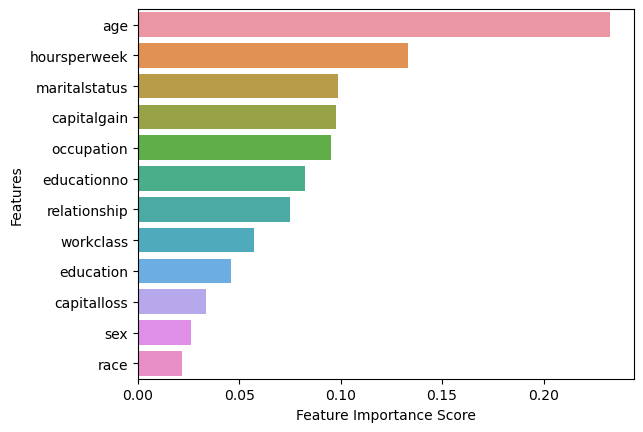

In [27]:
sns.barplot(x=fe_imp,y=fe_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [28]:
ns.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [29]:
nb.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [30]:
ns

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,9,3,0,40,0
15056,39,13,0,9,1,0,36,0
15057,38,13,2,9,0,0,50,0
15058,44,13,0,0,3,5455,40,0


In [31]:
nb

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174.0,40.0,0
1,50,13,2,3,0,0.0,13.0,0
2,38,9,0,5,1,0.0,40.0,0
3,53,7,2,5,0,0.0,40.0,0
4,28,13,2,10,5,0.0,40.0,0
...,...,...,...,...,...,...,...,...
10908,35,9,4,14,4,0.0,72.0,0
10909,40,10,2,0,5,0.0,40.0,1
10910,46,4,2,10,5,0.0,45.0,0
10912,33,9,4,2,1,0.0,40.0,0


In [32]:
ns[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


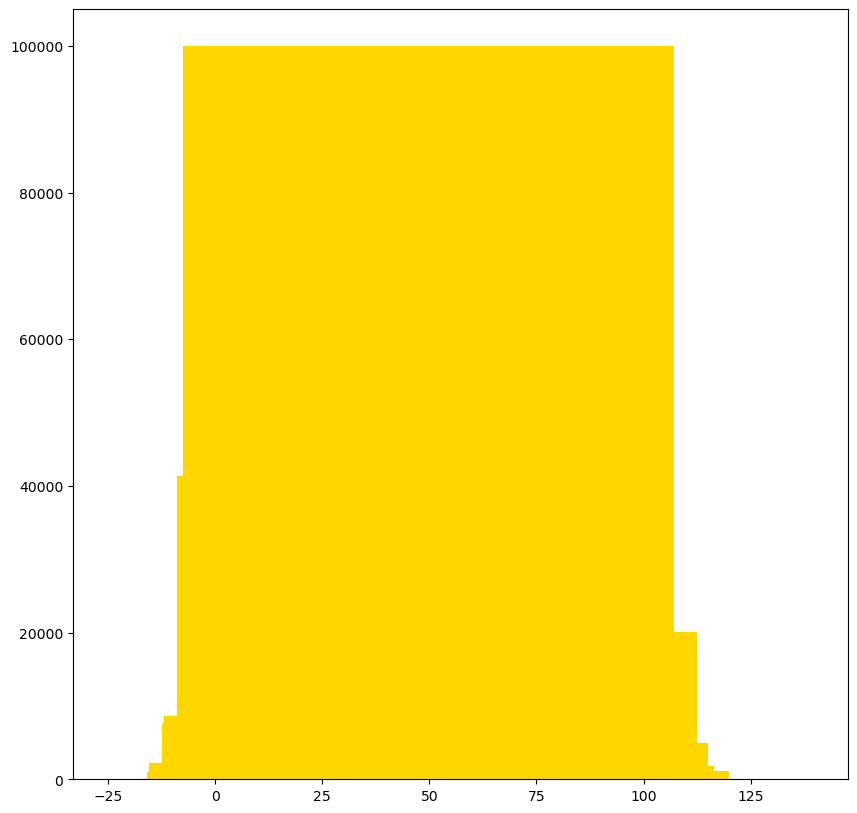

In [33]:
plt.figure(figsize=(10,10))
plt.bar(ns['age'],ns['capitalgain'],ns['hoursperweek'],color='gold')
plt.show()

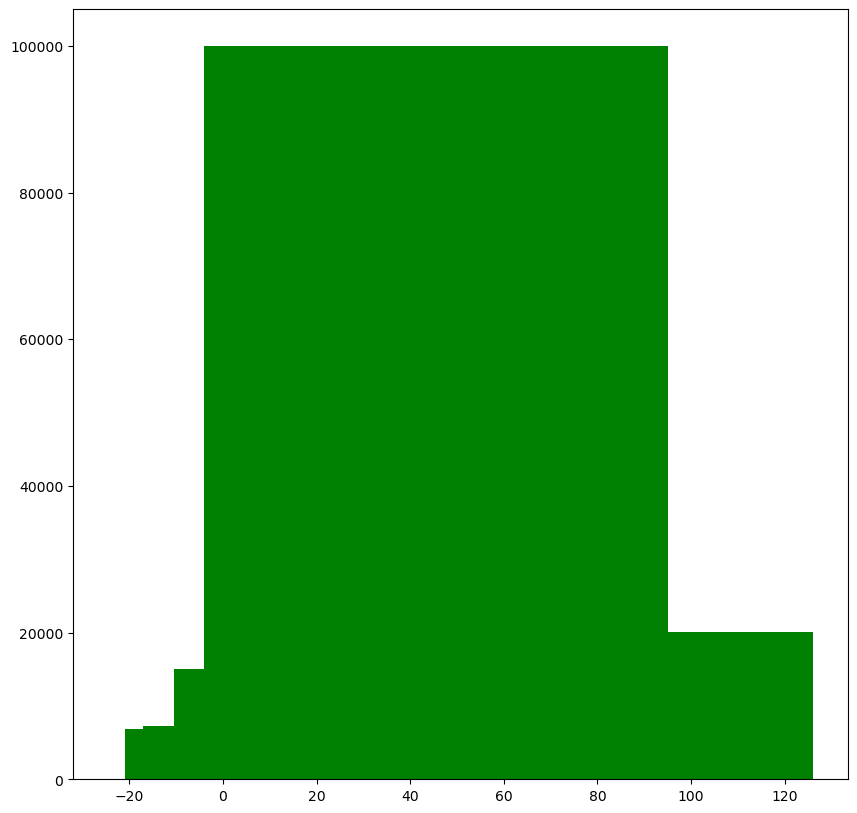

In [34]:
plt.figure(figsize=(10,10))
plt.bar(nb['age'],nb['capitalgain'],nb['hoursperweek'],color='green')
plt.show()

In [35]:
nb[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,9898.000000,9897.000000,9897.000000
mean,38.847545,1188.774578,41.258159
std,13.161133,7729.860054,12.214895
min,17.000000,0.000000,1.000000
25%,28.000000,0.000000,40.000000
50%,37.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


# IN THE THIS STEP

fitting the train data

Transforming thr train data

transforming the test data

In [36]:
sc=StandardScaler()
sc.fit(nb[['age','capitalgain','hoursperweek']])

ns[['age','capitalgain','hoursperweek']]=sc.transform(ns[['age','capitalgain','hoursperweek']])
nb[['age','capitalgain','hoursperweek']]=sc.transform(nb[['age','capitalgain','hoursperweek']])

In [37]:
ns.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.052208,7,4,6,3,-0.153798,-0.103007,0
1,-0.064401,9,2,4,0,-0.153798,0.715707,0
2,-0.824252,12,2,10,0,-0.153798,-0.103007,1
3,0.391510,10,2,6,0,0.840837,-0.103007,1
4,-0.368341,6,4,7,1,-0.153798,-0.921721,0


In [38]:
nb.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,0.011584,13,4,0,1,0.127464,-0.103007,0
1,0.847421,13,2,3,0,-0.153798,-2.313535,0
2,-0.064401,9,0,5,1,-0.153798,-0.103007,0
3,1.075376,7,2,5,0,-0.153798,-0.103007,0
4,-0.824252,13,2,10,5,-0.153798,-0.103007,0


In [39]:
ns['Salary'].value_counts()

0    10093
1     3357
Name: Salary, dtype: int64

# BULDING THE NAIVE BAYES MODEL

In [70]:
from sklearn.naive_bayes import GaussianNB

In [77]:
x_train=ns.iloc[:,:-1]
y_train=ns.iloc[:,-1]

In [78]:
x_test=nb.iloc[:,:-1]
y_test=nb.iloc[:,-1]

In [79]:
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB()

In [80]:
y_pred = gn.predict(x_train)

In [81]:
cm1=confusion_matrix(y_train,y_pred)
cm1

array([[9820,  273],
       [2581,  776]], dtype=int64)

Text(20.72222222222222, 0.5, 'True class')

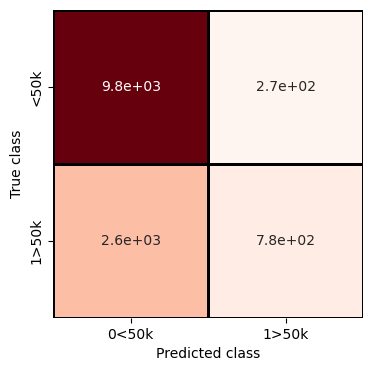

In [82]:
fig,an=plt.subplots(1,1,figsize=(4,4),dpi=100)

xlabels=['0<50k','1>50k']
ylabels=['<50k','1>50k']

sns.heatmap(cm1,annot=True,cbar=None,cmap="Reds",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
an.set_xlabel('Predicted class')
an.set_ylabel('True class')

In [83]:
names=['0,50k','1>50k']
print(classification_report(y_train,y_pred,target_names=names))

              precision    recall  f1-score   support

       0,50k       0.79      0.97      0.87     10093
       1>50k       0.74      0.23      0.35      3357

    accuracy                           0.79     13450
   macro avg       0.77      0.60      0.61     13450
weighted avg       0.78      0.79      0.74     13450

